# BioML: Model Training Experiment - KNN

Computational Identification of Protein Phosphorylation Sites

In [11]:
import sys
import os

# To import lib from grandparent directory
current_dir = os.getcwd()
grandparent_dir = os.path.abspath(os.path.join(current_dir, "../../"))
sys.path.append(grandparent_dir)

In [12]:
from lib import encoder, evaluate
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Hyperparameters

In [13]:
k = 3
train_test_split_test_size = 0.2

### Loading data

In [14]:
# Seqs = encoder.Encoder("../../dataset/31mer/test/positive_cd_hit50.test.fasta",
#                        "../../dataset/31mer/test/negative_cd_hit50.test.fasta",
#                        balance=True, upsample=True)
Seqs = encoder.Encoder("../../dataset/31mer/cd_hit50/positive_cd_hit50.fasta",
                       "../../dataset/31mer/cd_hit50/negative_cd_hit50.fasta",
                       balance=True, upsample=True)

### Encoding

In [15]:
posOneHot, negOneHot = Seqs.ToOneHot()

X_data, y_data = encoder.GetLebel(posOneHot, negOneHot)
X_data = np.array(X_data)
y_data = np.array(y_data)
print(X_data.shape, y_data.shape)

(64724, 31, 20) (64724,)


### Train-test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=train_test_split_test_size, random_state=87)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(51779, 31, 20) (51779,) (12945, 31, 20) (12945,)
(51779, 620) (51779,) (12945, 620) (12945,)


In [17]:
KKN = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

ACC:  0.5982232522209348
              precision    recall  f1-score   support

           0       0.67      0.64      0.66      7774
           1       0.50      0.53      0.52      5171

    accuracy                           0.60     12945
   macro avg       0.59      0.59      0.59     12945
weighted avg       0.60      0.60      0.60     12945



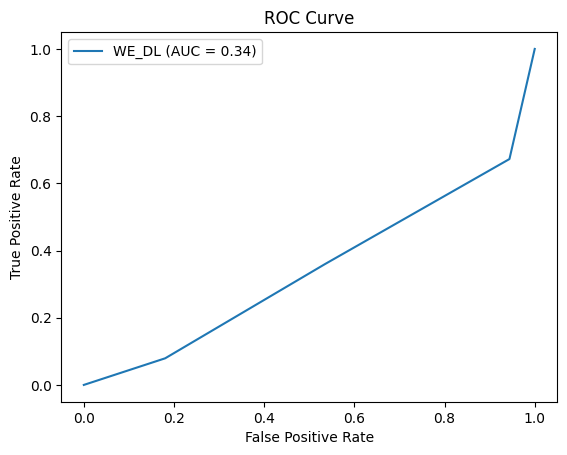

   Accuracy  Sensitivity  Specificity       MCC       PPV       NPV
0  0.598223     0.534519     0.640597  0.173278  0.497301  0.674157


In [18]:
y_pred = KKN.predict(X_test)
y_proba = KKN.predict_proba(X_test)[:, 1]
acc = evaluate.ACC(y_test, y_pred)
print("ACC: ", acc)
print(metrics.classification_report(y_test, y_pred))
evaluate.ROC_curve(y_test, y_proba)
print(evaluate.Result(y_test, y_pred))